In [1]:
# Welcome to the HDMM_NN Tutorial! For an overview of what HDDM is about, as well as installation instructions, 
# visit the github page of this tutorial.

In [ ]:
# TODO: PRERUN MCMC SAMPLING AND STORE TRACES IN DATA_STORAGE/TRACES/
# SO WE HAVE THE CHANCE TO FORGO SAMPLING

In [14]:
# Module imports
import hddm
import sys
import pandas as pd
import numpy as np
import sys
import pickle
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('simulators')
import cddm_data_simulation as cds
import boundary_functions as bf

from helper_functions import simulator
from helper_functions import model_plot
from helper_functions import caterpillar_plot
from helper_functions import posterior_pair_plot
from helper_functions import hddm_preprocess_hierarchical
from helper_functions import simulator_condition_effects
from helper_functions import make_parameter_sets
# posterior predictive plot
# caterpillar plot
from helper_functions import _make_trace_plotready_condition

from helper_functions import hddm_preprocess

# Section 1: A look into DDM variations

In [5]:
# Let's simulate some data from the angle model and check the resulting (choice, reaction) time data.
# You can change the number of samples (n_samples), and the parameters of the model (v, a, w, ndt, theta). 
# If you are outside of the valid range for any parameter you will be warned.

In [ ]:
# Let's start with angular bounds

In [ ]:
# TODO: put in exlanantion about angle model and what paraeters means. 

In [2]:
# LETS START WITH MAKING SOME PARAMETERS FOR OUR MODEL OF CHOICE
angle_params = make_parameter_sets(model = 'angle',
                                   n_parameter_sets = 1,
                                   param_dict = {'v': [1]})

In [3]:
angle_params.values[0]

array([1.        , 1.22646232, 0.41756297, 1.1594702 , 0.84798814])

In [4]:
# THE SIMULATOR FUNCTION
simulations = simulator(theta = angle_params.values[0], 
                        model = 'angle', 
                        n_samples = 2000)

In [5]:
# TODO: Show data

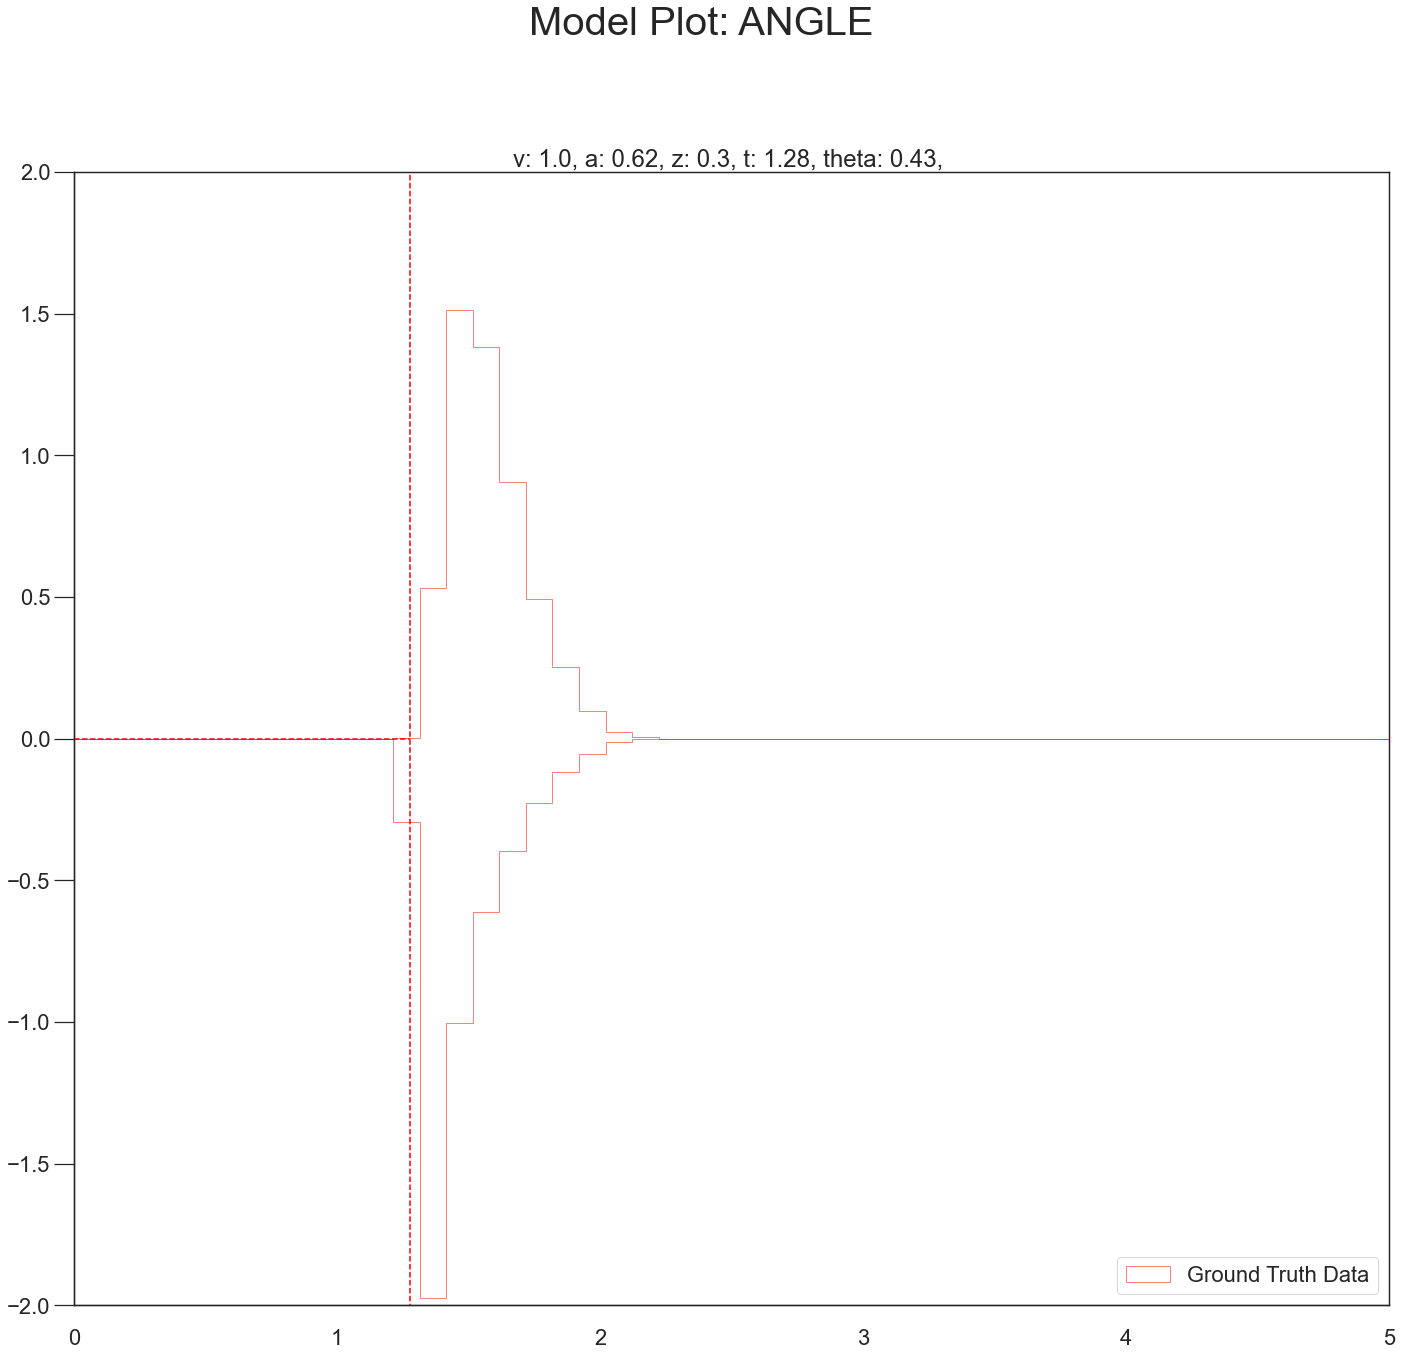

In [5]:
# Model Plots (Only data)
model_plot(ground_truths = angle_params.values[0],
           posterior_samples = None,
           cols = 1, 
           model = 'angle',
           datatype = 'single_subject',
           n_plots = 1,
           max_t = 5,
           show_model = False)

In [6]:
# Look into the simulator
simulations

(array([[1.5862023],
        [1.5332029],
        [1.4082028],
        ...,
        [1.3602027],
        [1.4622029],
        [1.5662025]], dtype=float32),
 array([[ 1],
        [ 1],
        [-1],
        ...,
        [-1],
        [ 1],
        [ 1]], dtype=int32),
 {'v': 1.0,
  'a': 0.6222031712532043,
  'w': 0.30271339416503906,
  'ndt': 1.27620267868042,
  's': 1.0,
  'theta': 0.4322955608091238,
  'delta_t': 0.0010000000474974513,
  'max_t': 20.0,
  'n_samples': 2000,
  'simulator': 'ddm_flexbound',
  'boundary_fun_type': 'angle',
  'possible_choices': [-1, 1]})

10


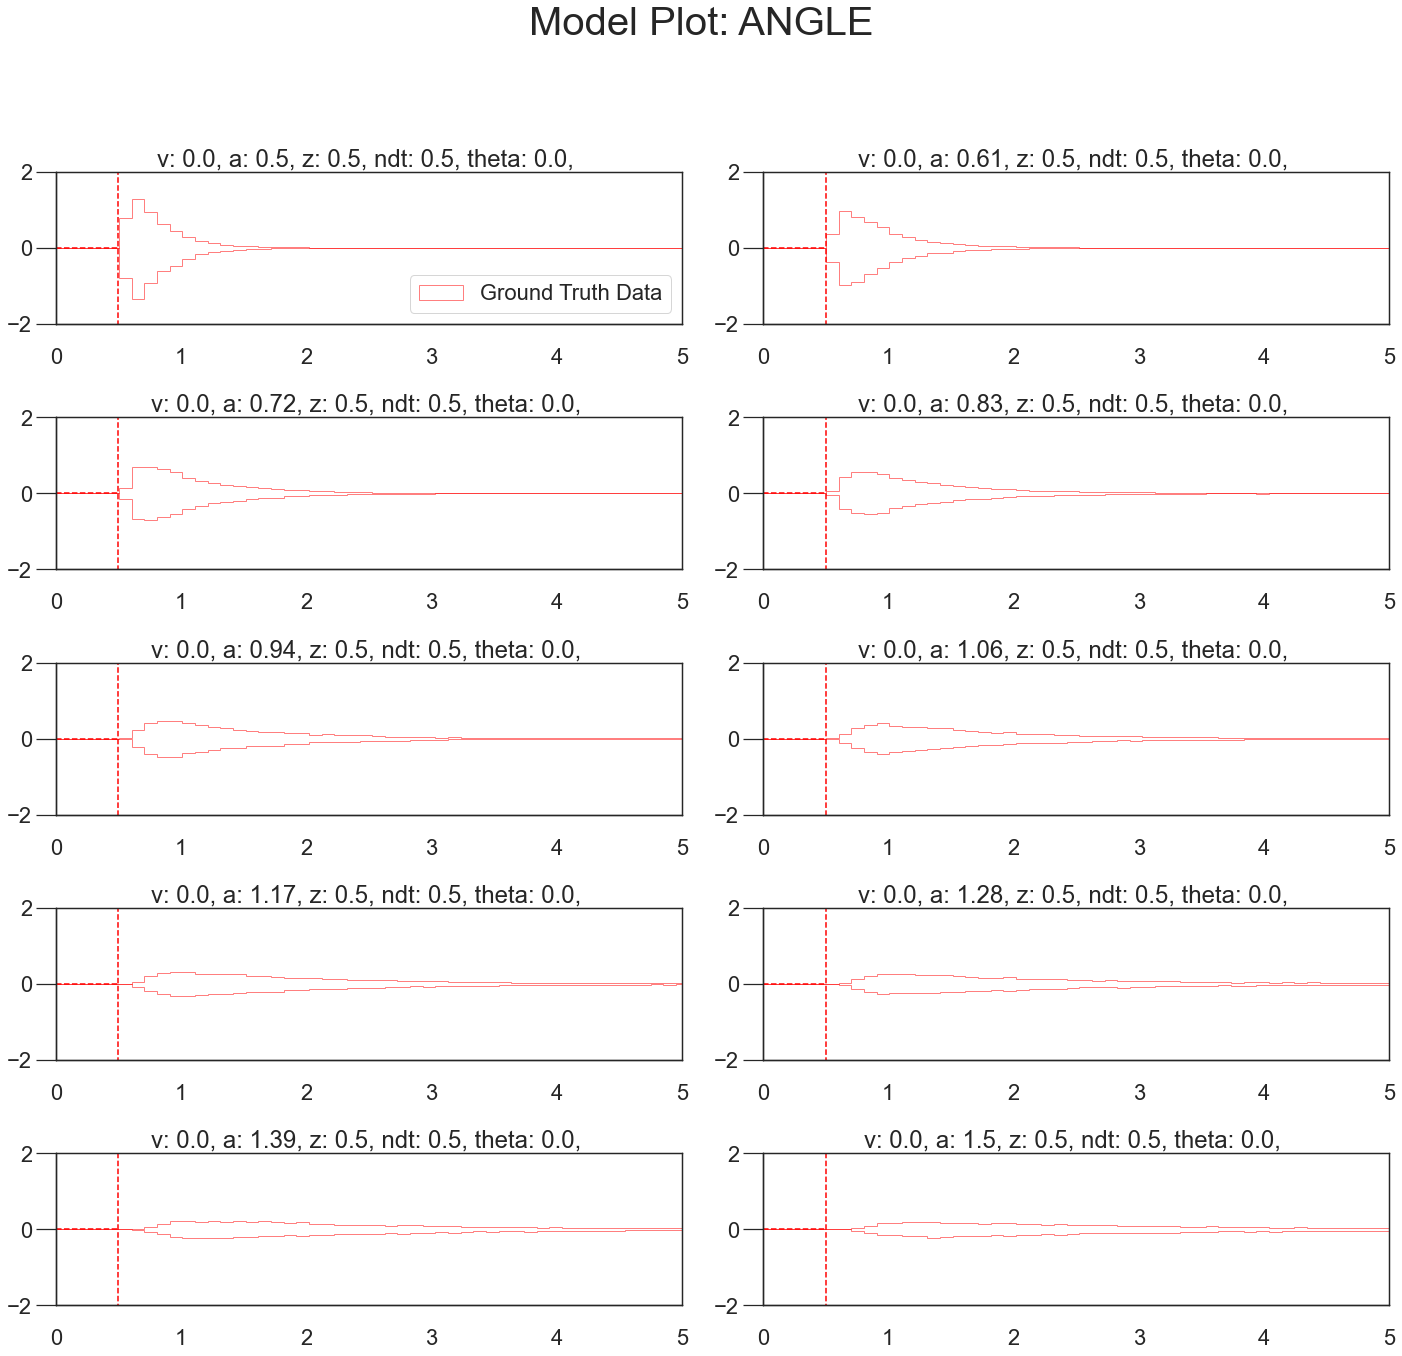

In [26]:
# Plotting the data
angle_params = make_parameter_sets(model = 'angle',
                                   n_parameter_sets = 10,
                                   param_dict = {'a': [i for i in np.linspace(0.5, 1.5, 10)],
                                                 'v': [0],
                                                 'z': [0.5],
                                                 'theta': [0],
                                                 't': [0.5]})

# Model Plots (Only data)
model_plot(ground_truths = angle_params.values,
           cols = 2, 
           model = 'angle',
           n_plots = 10,
           max_t = 5,
           show_model = False)

In [ ]:
# TODO: INVESTIGATE BEHAVIOR OF MODEL SIMULATIONS WHEN CHANGING PARAMETERS A BIT

10


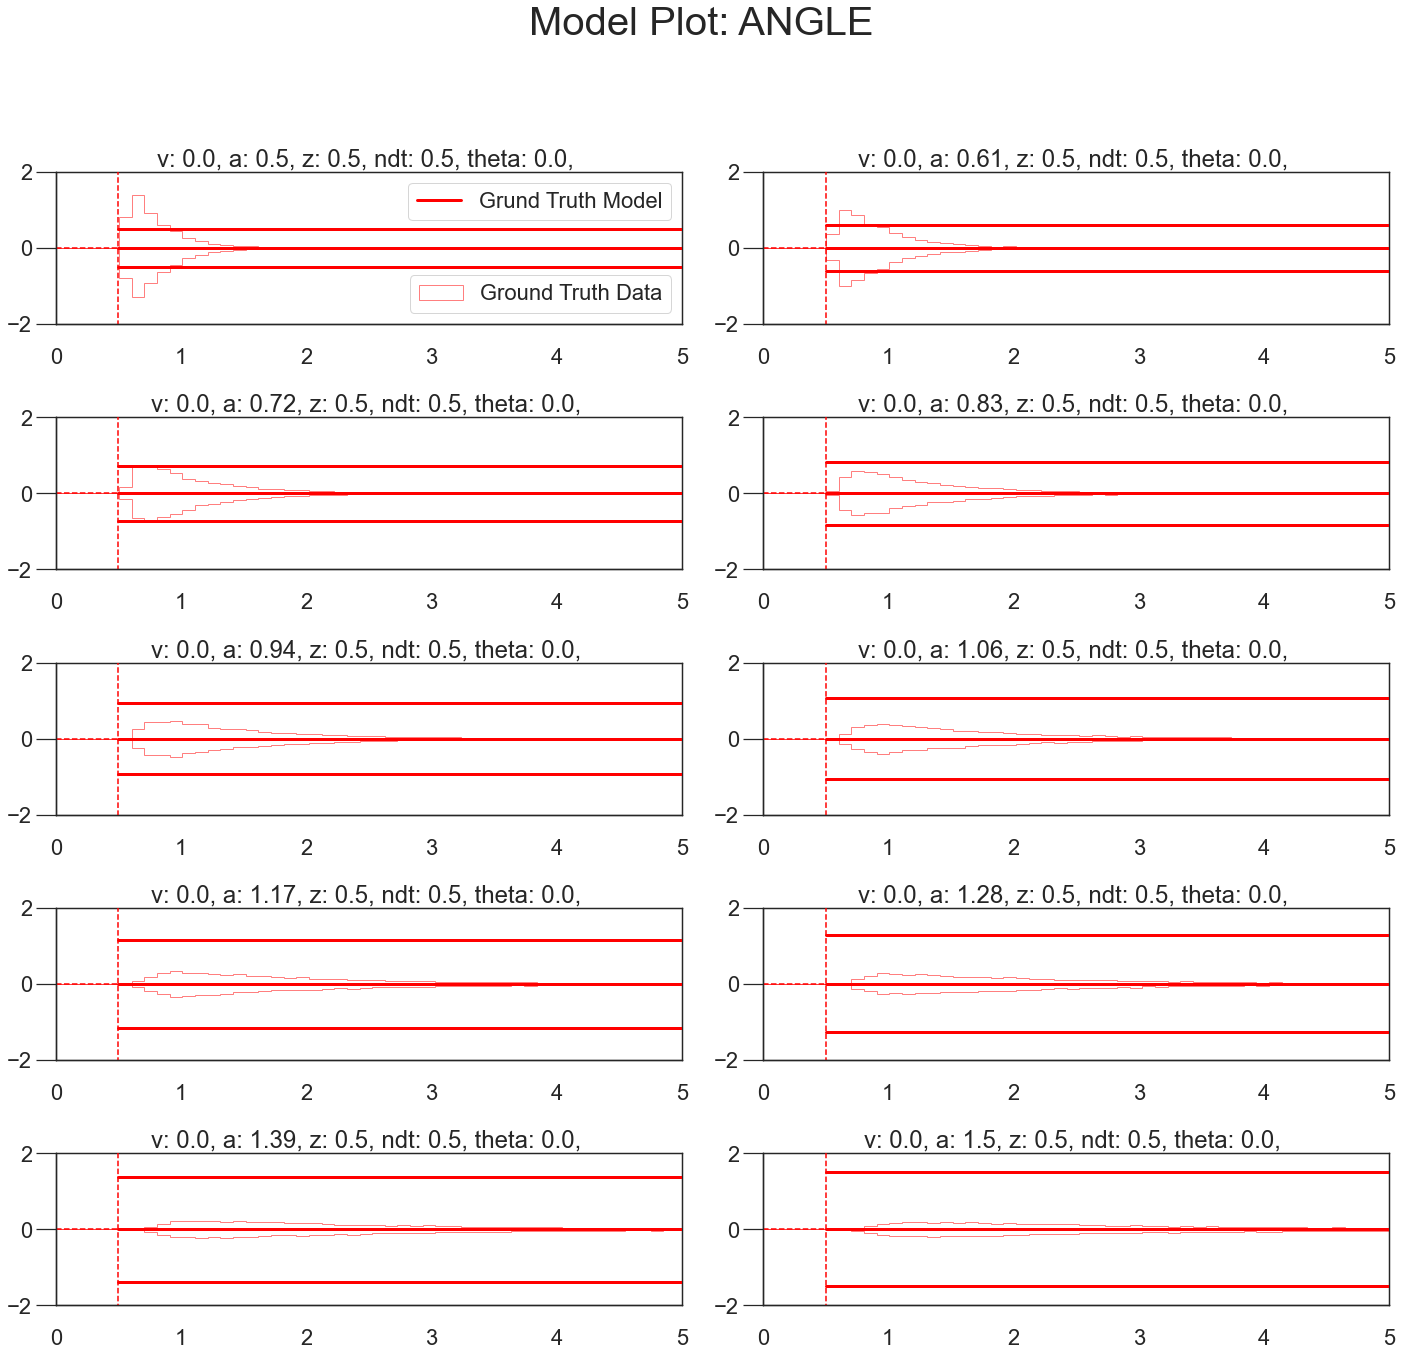

In [27]:
# Model Plot (Data + Model)
model_plot(ground_truths = angle_params.values,
           cols = 2, 
           model = 'angle',
           n_plots = 10,
           max_t = 5,
           show_model = True)

In [ ]:
# Section 2: Single subjects (collapsed data) fit

In [ ]:
# TODO: PREPEND ANGLE EQUIVALENT PART

In [15]:
# Generating some data
weibull_params = make_parameter_sets(model = 'weibull_cdf',
                                     n_parameter_sets = 1)

simulations = simulator(theta = weibull_params.values[0],
                        model = 'weibull_cdf', 
                        n_samples = 1000)

hddm_data_single_subject = hddm_preprocess(simulations)

In [16]:
weibull_params

v         a         z         t     alpha      beta
0  0.408295  1.411995  0.583356  1.485064  2.172074  2.287572

In [17]:
# Defining a hddm model
hddm_model_single_subject = hddm.HDDMnn_weibull(hddm_data_single_subject, 
                                                informative = False, 
                                                free = False, 
                                                k = True,
                                                include = ['z'],
                                                is_group_model = False)

In [18]:
nmcmc = 1000
hddm_model_single_subject.sample(nmcmc, 
                                 burn = 200)

 [-----------------100%-----------------] 1000 of 1000 complete in 141.9 sec

In [19]:
# A look at the trace object
hddm_model_single_subject.get_traces()

a         v         t   z_trans      beta     alpha
0    1.999233  0.421146  1.386044  0.248405  2.175184  0.882526
1    1.999568  0.370598  1.391481  0.244471  2.136745  0.798233
2    1.995966  0.433896  1.398692  0.221380  2.166156  0.781081
3    1.996761  0.416843  1.397816  0.223160  2.197548  0.767816
4    1.991582  0.415941  1.395236  0.226348  2.200117  0.751959
..        ...       ...       ...       ...       ...       ...
795  1.998994  0.419023  1.409554  0.260899  2.141731  0.824419
796  1.999868  0.439825  1.390054  0.251742  2.168498  0.843274
797  1.990622  0.458275  1.392908  0.213778  2.311527  0.777502
798  1.986652  0.408394  1.402394  0.203499  2.372354  0.721508
799  1.996048  0.415911  1.412454  0.273505  2.272222  0.761772

[800 rows x 6 columns]

In [ ]:
# Q: CAN SOMEONE TELL US WHAT A THIS TRACE ACTUALLY GIVES US?

In [20]:
weibull_params.values

array([[0.40829516, 1.41199455, 0.58335604, 1.48506407, 2.17207393,
        2.28757196]])

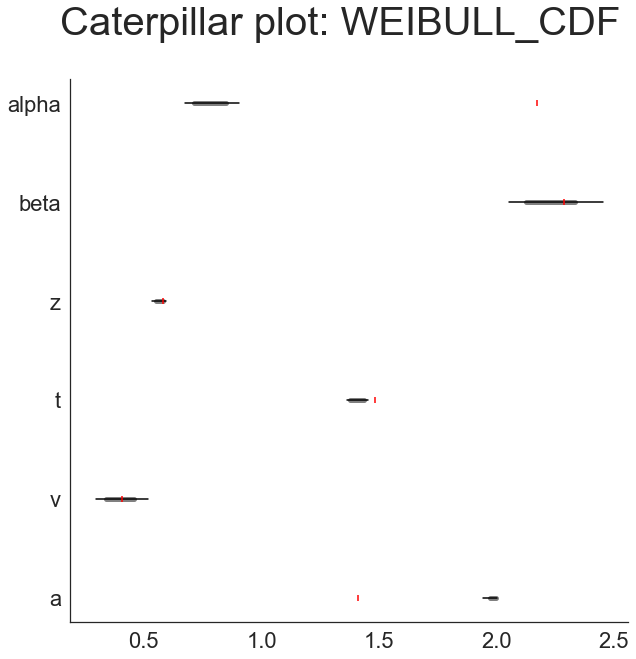

In [21]:
# Caterpillar Plot: (Parameters recovered ok?)
caterpillar_plot(posterior_samples = hddm_model_single_subject.get_traces(),
                 ground_truths = weibull_params.values[0],
                 model = 'weibull_cdf',
                 datatype = 'single_subject',
                 drop_sd = True)

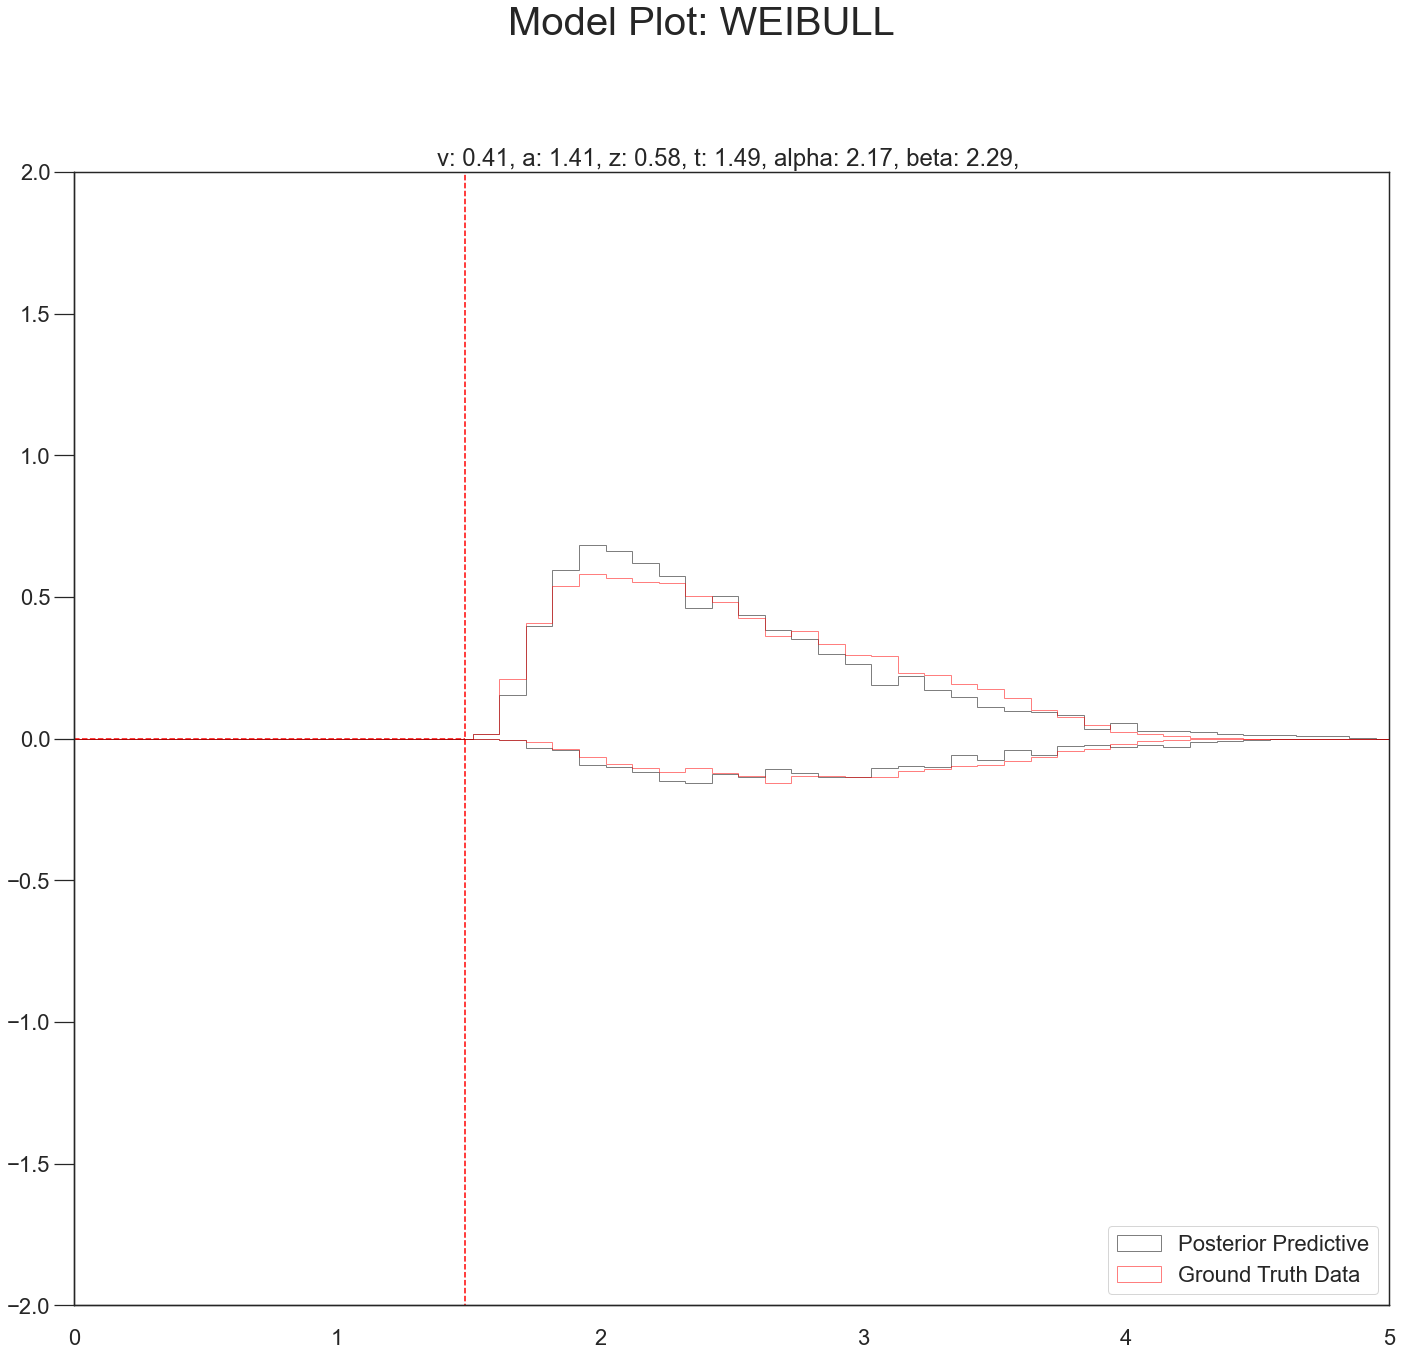

In [22]:
# Posterior Predictive: Do we generate meaningful data from the Posterior Model?
model_plot(ground_truths = weibull_params.values[0],
           posterior_samples = hddm_model_single_subject.get_traces(),
           model = 'weibull_cdf',
           n_post_params = 500,
           cols = 1,
           n_plots = 1,
           max_t = 5, 
           show_model = False,
           input_hddm_trace = True,
           datatype = 'single_subject')

In [12]:
weibull_params.values

array([[0.34535013, 0.65701702, 0.4279098 , 0.75895701, 3.57998354,
        3.10807324]])

passed through legend part
0
0


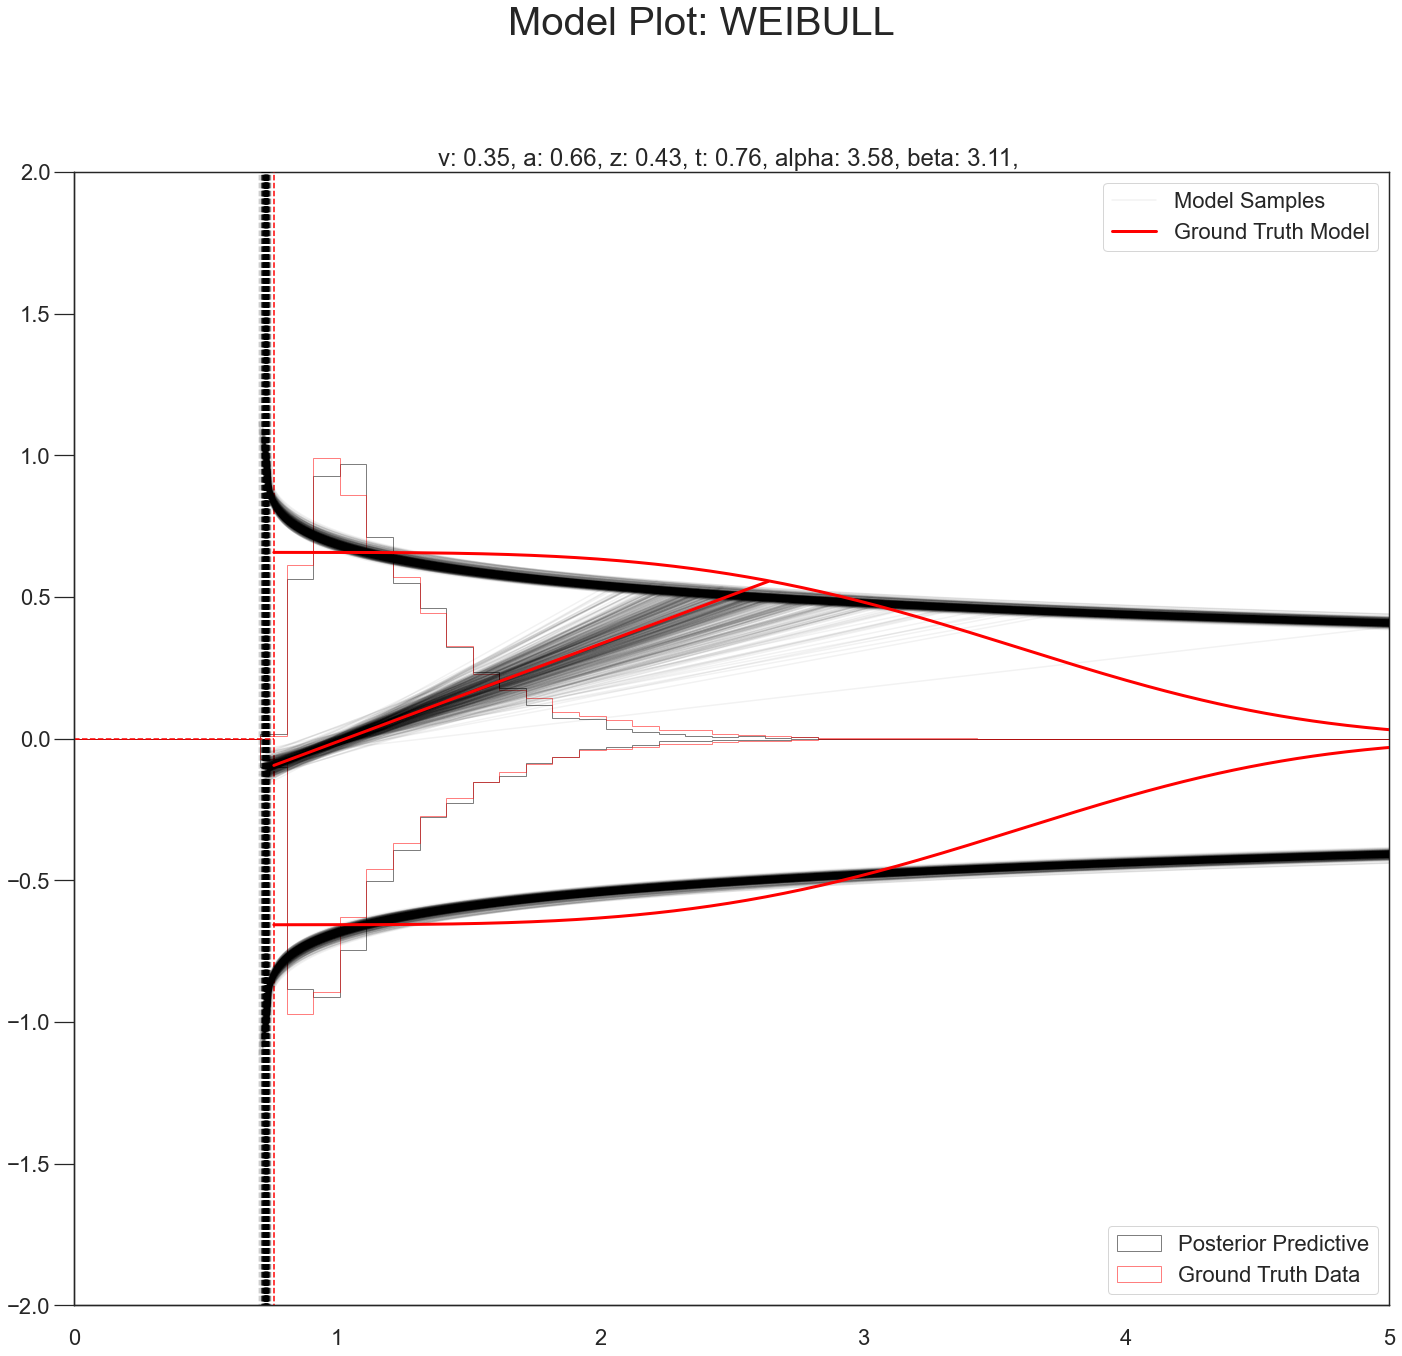

In [13]:
# Posterior Predictive: Do the 'Posterior Models' also make sense?
model_plot(ground_truths = weibull_params.values[0],
           posterior_samples = hddm_model_single_subject.get_traces(),
           model = 'weibull_cdf',
           n_post_params = 500,
           cols = 1,
           n_plots = 1,
           max_t = 5,
           show_model = True,
           input_hddm_trace = True,
           datatype = 'single_subject')

Plotting a
Plotting v
Plotting t
Plotting z
Plotting beta
Plotting alpha


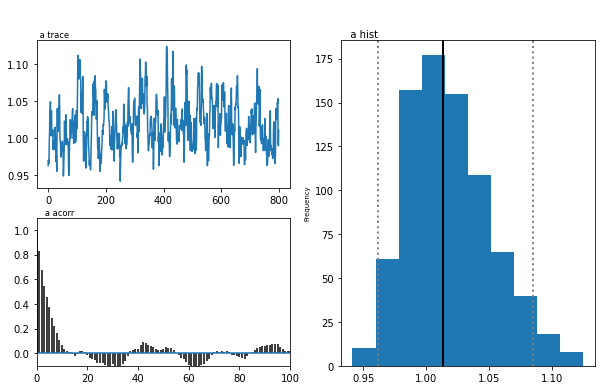

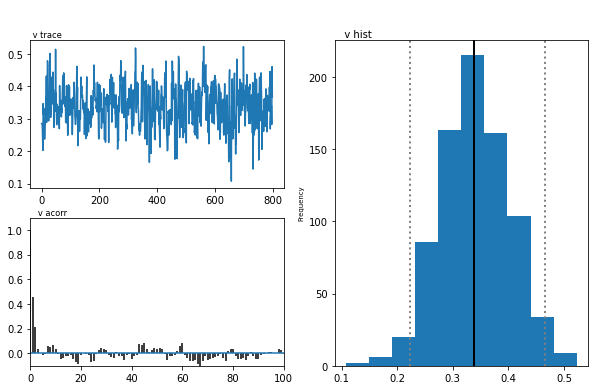

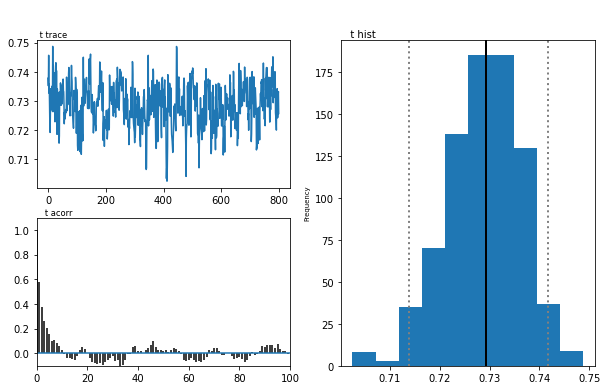

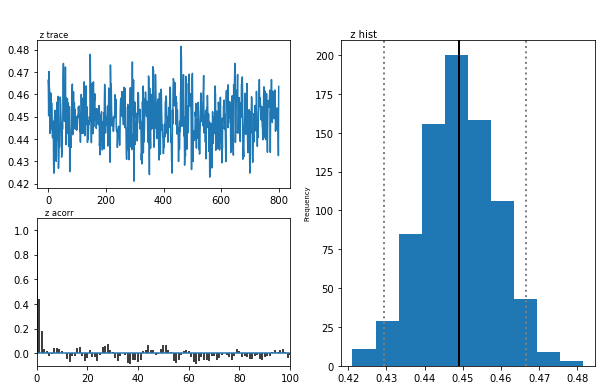

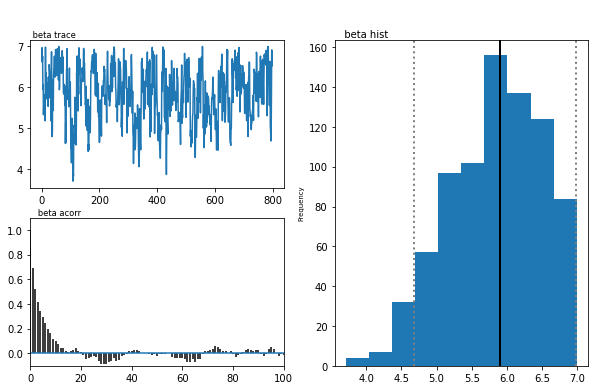

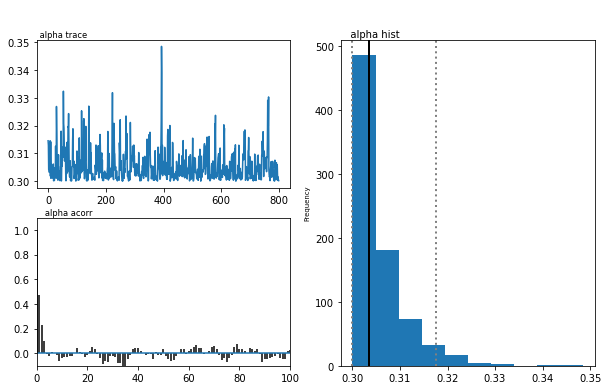

In [11]:
hddm_model_single_subject.plot_posteriors(['a', 't', 'v', 'z', 'alpha', 'beta'])

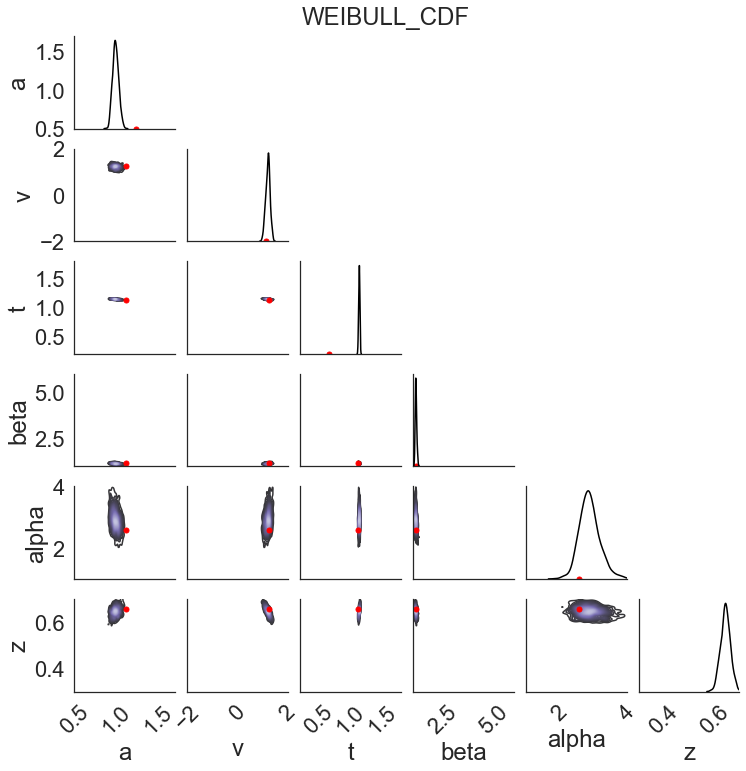

In [64]:
# Pairwise posterior plot
posterior_pair_plot(posterior_samples = posterior_samples_single_subject,
                    height = 10,
                    aspect = 1,
                    n_subsample = 1000,
                    gt_available = True,
                    gt = weibull_params.values[0],
                    model = 'weibull_cdf')

In [ ]:
# Section 3: FITTING NON-STANDARD MODELS HIERARCHICAL

In [ ]:
# SOME EXPLANATIONS ON THE KIND OF HIERARCHICAL MODEL WE FIT HERE

In [ ]:
# ANGLE MODEL

In [40]:
hddm_data_hierarchical_angle = hddm_preprocess_hierarchical(model = 'angle', 
                                                            datasetid = 0)

In [42]:
hddm_data_hierarchical_angle

(      response        rt  subj_idx  nn_response
 0          0.0  2.202141       0.0         -1.0
 1          1.0  1.756146       0.0          1.0
 2          0.0  1.698147       0.0         -1.0
 3          0.0  2.064142       0.0         -1.0
 4          0.0  1.943144       0.0         -1.0
 ...        ...       ...       ...          ...
 4995       0.0  2.491104       4.0         -1.0
 4996       1.0  2.261105       4.0          1.0
 4997       1.0  1.878110       4.0          1.0
 4998       0.0  2.188106       4.0         -1.0
 4999       0.0  2.316104       4.0         -1.0
 
 [5000 rows x 4 columns],
           v         a         z         t     theta
 0 -1.318299  1.570190  0.610825  1.438147  0.926974
 1 -1.330776  1.635546  0.608748  1.468413  0.924265
 2 -1.320850  1.531458  0.607654  1.557672  0.905594
 3 -1.312905  1.525236  0.609006  1.506820  0.942146
 4 -1.329437  1.553136  0.606771  1.454112  0.921670,
           v        a         z         t     theta
 0  0.006517 

In [44]:
hddm_hierarchical_model_angle = hddm.HDDMnn_angle(hddm_data_hierarchical_angle[0], 
                                            free = False,  
                                            informative = False, 
                                            include = 'z',
                                            is_group_model = True)

In [46]:
# Sampling:
nmcmc = 100
hddm_hierarchical_model_angle.sample(nmcmc,
                               burn = 50, 
                               dbname = 'traces_hierarchical_angle_tutorial.db', 
                               db = 'pickle')

 [-----------------101%-----------------] 101 of 100 complete in 197.4 sec

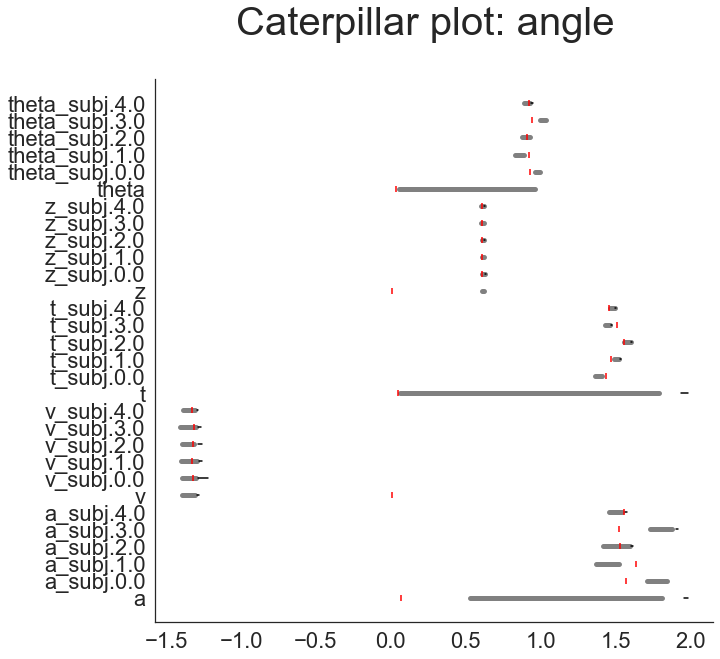

In [47]:
# Caterpillar Plot
caterpillar_plot(posterior_samples = hddm_hierarchical_model_angle.get_traces(),
                 ground_truths = hddm_data_hierarchical_angle,
                 model = 'angle',
                 datatype = 'hierarchical',
                 drop_sd = True)

5


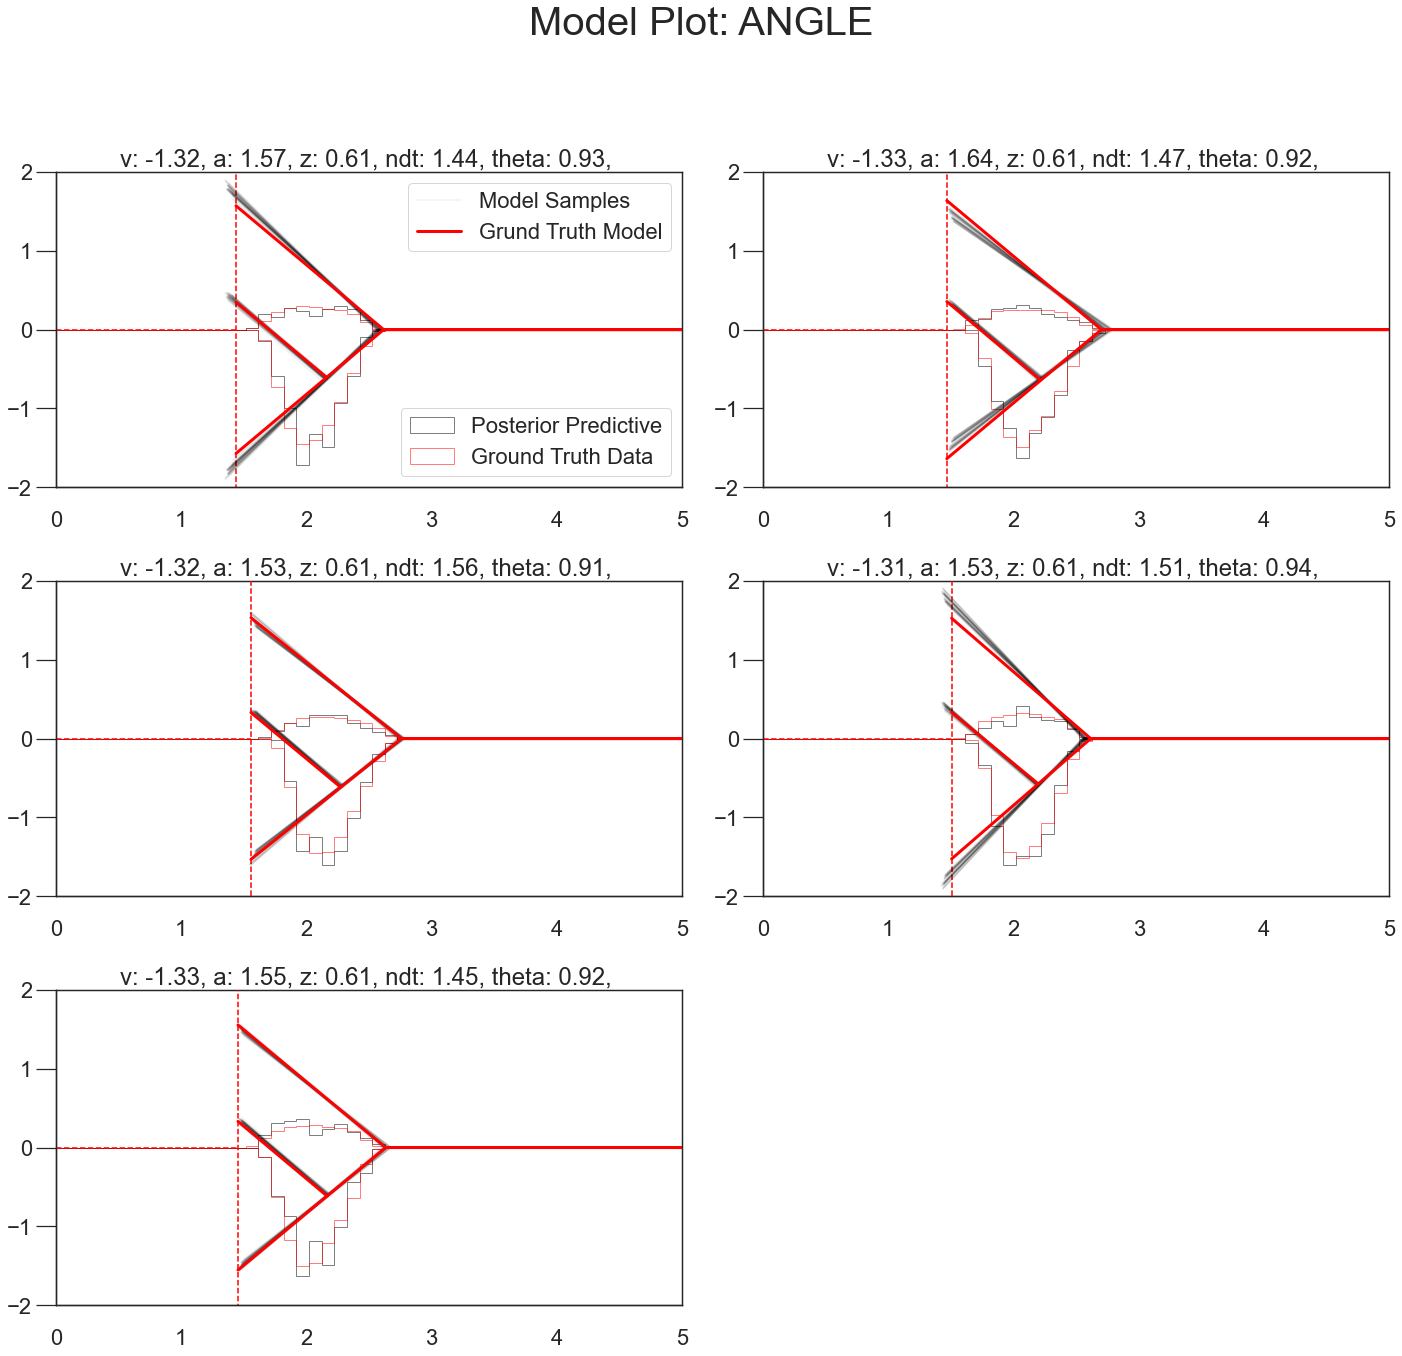

In [48]:
# Posterior Predictive
model_plot(ground_truths = hddm_data_hierarchical_angle[1].values,
           posterior_samples = hddm_hierarchical_model_angle.get_traces(),
           input_hddm_trace = True,
           n_post_params = 50,
           cols = 2, 
           model = 'angle',
           datatype = 'hierarchical',
           n_plots = 5,
           max_t = 5,
           show_model = True)

In [2]:
# WEIBULL
hddm_data_hierarchical_weibull_cdf = hddm_preprocess_hierarchical(model = 'weibull_cdf', datasetid = 1)

In [8]:
hddm_data_hierarchical_weibull_cdf

(      response        rt  subj_idx  nn_response
 0          1.0  2.125856       0.0          1.0
 1          1.0  1.877859       0.0          1.0
 2          0.0  2.042857       0.0         -1.0
 3          0.0  2.124856       0.0         -1.0
 4          1.0  2.590876       0.0          1.0
 ...        ...       ...       ...          ...
 4995       0.0  2.953006       4.0         -1.0
 4996       0.0  2.591989       4.0         -1.0
 4997       0.0  1.353976       4.0         -1.0
 4998       1.0  2.305975       4.0          1.0
 4999       0.0  2.496984       4.0         -1.0
 
 [5000 rows x 4 columns],
           v         a         z         t     alpha      beta
 0 -0.060218  1.313313  0.384968  1.151865  2.133997  1.569213
 1 -0.075177  1.290445  0.435621  1.098726  2.150635  1.658163
 2 -0.066992  1.307375  0.411264  1.150821  2.203776  1.542108
 3 -0.137658  1.285835  0.425311  1.098753  2.142593  1.626302
 4 -0.066513  1.310350  0.429493  1.122976  2.156340  1.734752,
     

In [5]:
hddm_hierarchical_model_weibull_cdf = hddm.HDDMnn_weibull(hddm_data_hierarchical_weibull_cdf[0], 
                                                         free = False,  
                                                         informative = False, 
                                                         include = 'z',
                                                         k = True,
                                                         is_group_model = True)

In [6]:
nmcmc = 100
hddm_hierarchical_model_weibull_cdf.sample(nmcmc, burn = 50)

 [-----------------101%-----------------] 101 of 100 complete in 215.9 sec

In [ ]:
hddm_hierarchical_model_weibull_cdf.get_traces()

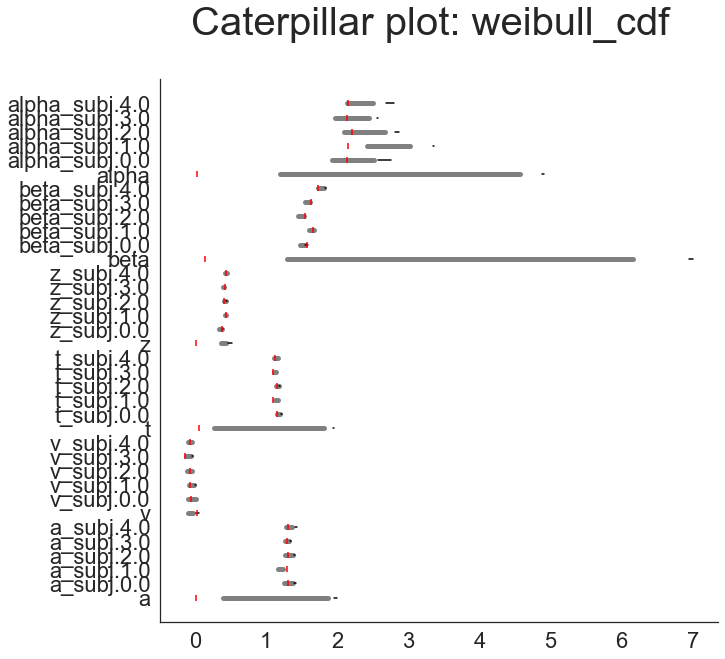

In [7]:
# Caterpillar Plot
caterpillar_plot(posterior_samples = hddm_hierarchical_model_weibull_cdf.get_traces(),
                 ground_truths = hddm_data_hierarchical_weibull_cdf,
                 model = 'weibull_cdf',
                 datatype = 'hierarchical',
                 drop_sd = True)

5


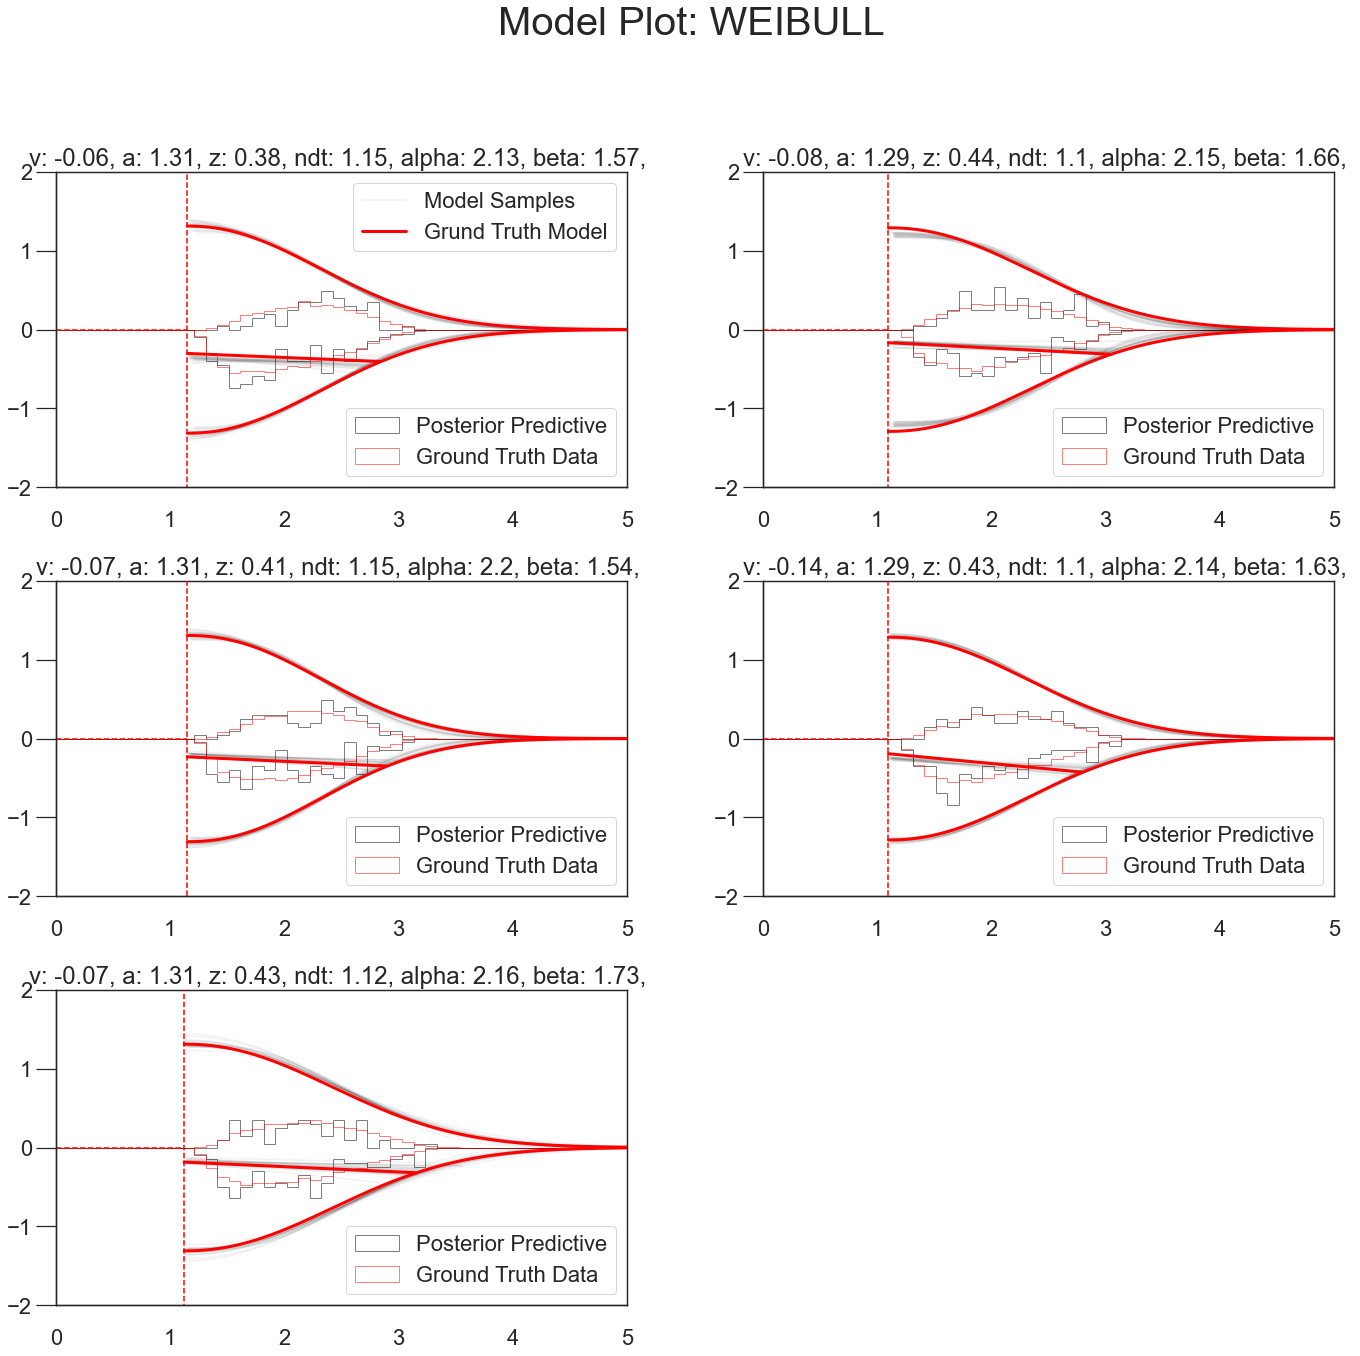

In [11]:
# Posterior Predictive
model_plot(ground_truths = hddm_data_hierarchical_weibull_cdf[1].values,
           posterior_samples = hddm_hierarchical_model_weibull_cdf.get_traces(),
           input_hddm_trace = True,
           n_post_params = 20,
           cols = 2, 
           model = 'weibull_cdf',
           datatype = 'hierarchical',
           n_plots = 5,
           max_t = 5,
           show_model = True)

In [ ]:
# SECTION 4: PARAMETER VARIES BY CONDITION

In [ ]:
# An important aspect of these posterior analysis, is the consideration of experiment design.
# We may have an experiment in which subject are exposed to a variety of conditions, 
# such as for example different degrees of difficulty of the same task

# It is often reasonable to assume that all but the conceptually relevant parameters are common across conditions

# As we will see, this can have important effects on the degree to which we will be able to recover 
# parameters from the data.

In [ ]:
# TODO: GIVE WRITTEN EXPLANATION OF ONE SUCH EXPERIMENTAL SETTING

In [100]:
# TODO: FIND CASE IN WHICH RECOVERY GETS BETTER BY INTRODUCING CONDITIONS

In [25]:
# Generating some data
# We generate data such that only one parameter varies by condition (in this case 'v' --> the slope)
hddm_data_condition, gt_condition, gt_mat_condition = simulator_condition_effects(n_conditions = 4, 
                                                                                  n_samples_by_condition = 1000,
                                                                                  condition_effect_on_param = ['z'], 
                                                                                  model = 'weibull_cdf',
                                                                                  )

2
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]
2
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]
2
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]
2
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]


In [26]:
hddm_data_condition

rt  response  nn_response  condition
0    0.635545       0.0           -1          0
1    1.415535       1.0            1          0
2    1.163539       1.0            1          0
3    0.795543       0.0           -1          0
4    1.696548       1.0            1          0
..        ...       ...          ...        ...
995  1.841555       1.0            1          3
996  0.770544       1.0            1          3
997  2.025563       0.0           -1          3
998  1.333537       1.0            1          3
999  1.096539       0.0           -1          3

[4000 rows x 4 columns]

In [27]:
gt_condition

{'z(0)': 0.36291119246581105,
 'z(1)': 0.5933758147875352,
 'z(2)': 0.30773670403877496,
 'z(3)': 0.6349762777208185,
 'v': 0.9133597467987338,
 'a': 1.0006151229173272,
 't': 0.42754458172923776,
 'alpha': 1.3864792497336822,
 'beta': 5.672869501159375}

In [28]:
hddm_model_condition = hddm.HDDMnn_weibull(hddm_data_condition, 
                                           informative = False, 
                                           free = False, 
                                           k = True,
                                           include = ['z'],
                                           is_group_model = False, 
                                           depends_on = {'z': 'condition'})

In [59]:
hddm_model_condition_angle = hddm.HDDMnn_angle(hddm_data_condition, 
                                               informative = False, 
                                               free = False, 
                                               #k = True,
                                               include = ['z'],
                                               is_group_model = False, 
                                               depends_on = {'z': 'condition'})

In [60]:
ncmcm  = 200
hddm_model_condition_angle.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 200 of 200 complete in 87.3 sec

In [63]:
hddm_model_condition_angle.print_stats()

           mean         std       2.5q        25q       50q       75q     97.5q       mc err
a      0.986316   0.0102197   0.960604   0.982742  0.987383  0.992932    1.0061   0.00102197
v      0.972848   0.0257871   0.913676   0.956829  0.972724  0.989649   1.02528   0.00257871
t      0.443029  0.00456133   0.435692   0.440095  0.442673  0.445701  0.452371  0.000456133
z(0)   0.378918  0.00919554   0.363168   0.371992  0.378867  0.386398  0.395685  0.000919554
z(1)   0.581654  0.00976902   0.561866   0.575269  0.582732  0.588006  0.600988  0.000976902
z(2)   0.289672  0.00817366   0.273938   0.284604   0.28884  0.295422  0.308193  0.000817366
z(3)   0.622926   0.0104321   0.604379   0.615815  0.623203  0.628797  0.645082   0.00104321
theta  0.101185   0.0121725  0.0753394  0.0955729  0.101428  0.107992  0.128274   0.00121725
DIC: 6816.440298
deviance: 6808.662776
pD: 7.777522


In [29]:
nmcmc = 200
hddm_model_condition.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 201 of 200 complete in 106.1 sec

In [30]:
hddm_model_condition.print_stats()

           mean         std      2.5q       25q       50q       75q     97.5q       mc err
a      0.941738  0.00870369  0.926151  0.935468  0.941469  0.945543  0.962815  0.000870369
v      0.976304   0.0252481  0.935123  0.957874  0.974404  0.994967    1.0296   0.00252481
t      0.452238  0.00425386   0.43994  0.450089  0.452356  0.454847  0.459066  0.000425386
z(0)   0.381424  0.00684334  0.367642  0.377016  0.381522  0.386589  0.394644  0.000684334
z(1)   0.591338   0.0113967  0.569724  0.583611  0.589975  0.599852  0.613226   0.00113967
z(2)   0.286599  0.00746371  0.271953  0.281888  0.285842  0.291825  0.300669  0.000746371
z(3)   0.632217  0.00873473  0.613582  0.625751  0.632489  0.639474  0.646969  0.000873473
beta    3.34072    0.220113   3.04315   3.16868   3.30839     3.497   3.90406    0.0220113
alpha   2.75561    0.200508   2.40229     2.599   2.75458   2.89478   3.16031    0.0200508
DIC: 6797.951885
deviance: 6789.734976
pD: 8.216909


In [17]:
hddm_model_condition.get_traces()

a         v         t  z_trans(0)  z_trans(1)  z_trans(2)  \
0   1.257665 -1.033919  0.673344   -0.918399    0.626218    0.258176   
1   1.267646 -1.023697  0.680478   -0.928448    0.656194    0.289291   
2   1.266798 -1.050341  0.676445   -0.923886    0.619299    0.315368   
3   1.261486 -1.056464  0.676952   -0.955281    0.652096    0.296695   
4   1.240397 -1.017502  0.688083   -0.967119    0.614586    0.312419   
..       ...       ...       ...         ...         ...         ...   
95  1.286133 -1.068794  0.672573   -0.904931    0.745555    0.261351   
96  1.279107 -1.023576  0.670029   -0.903503    0.645515    0.257649   
97  1.279714 -1.032290  0.674033   -0.918872    0.675937    0.266706   
98  1.274350 -1.058835  0.673261   -0.907885    0.695725    0.232328   
99  1.268884 -1.059977  0.675497   -0.915918    0.644200    0.213827   

    z_trans(3)      beta     alpha  
0     0.037191  6.743306  4.758858  
1    -0.015104  6.646755  4.747056  
2    -0.017877  6.701047  4.897890  
3     0.004346  6.713837  4.947364  
4    -0.043453  6.779348  4.889494  
..         ...       ...       ...  
95   -0.082406  6.407134  4.981636  
96   -0.082494  6.722080  4.989304  
97   -0.055845  6.860619  4.998826  
98   -0.008875  6.795641  4.998867  
99   -0.019057  6.535071  4.931026  

[100 rows x 9 columns]

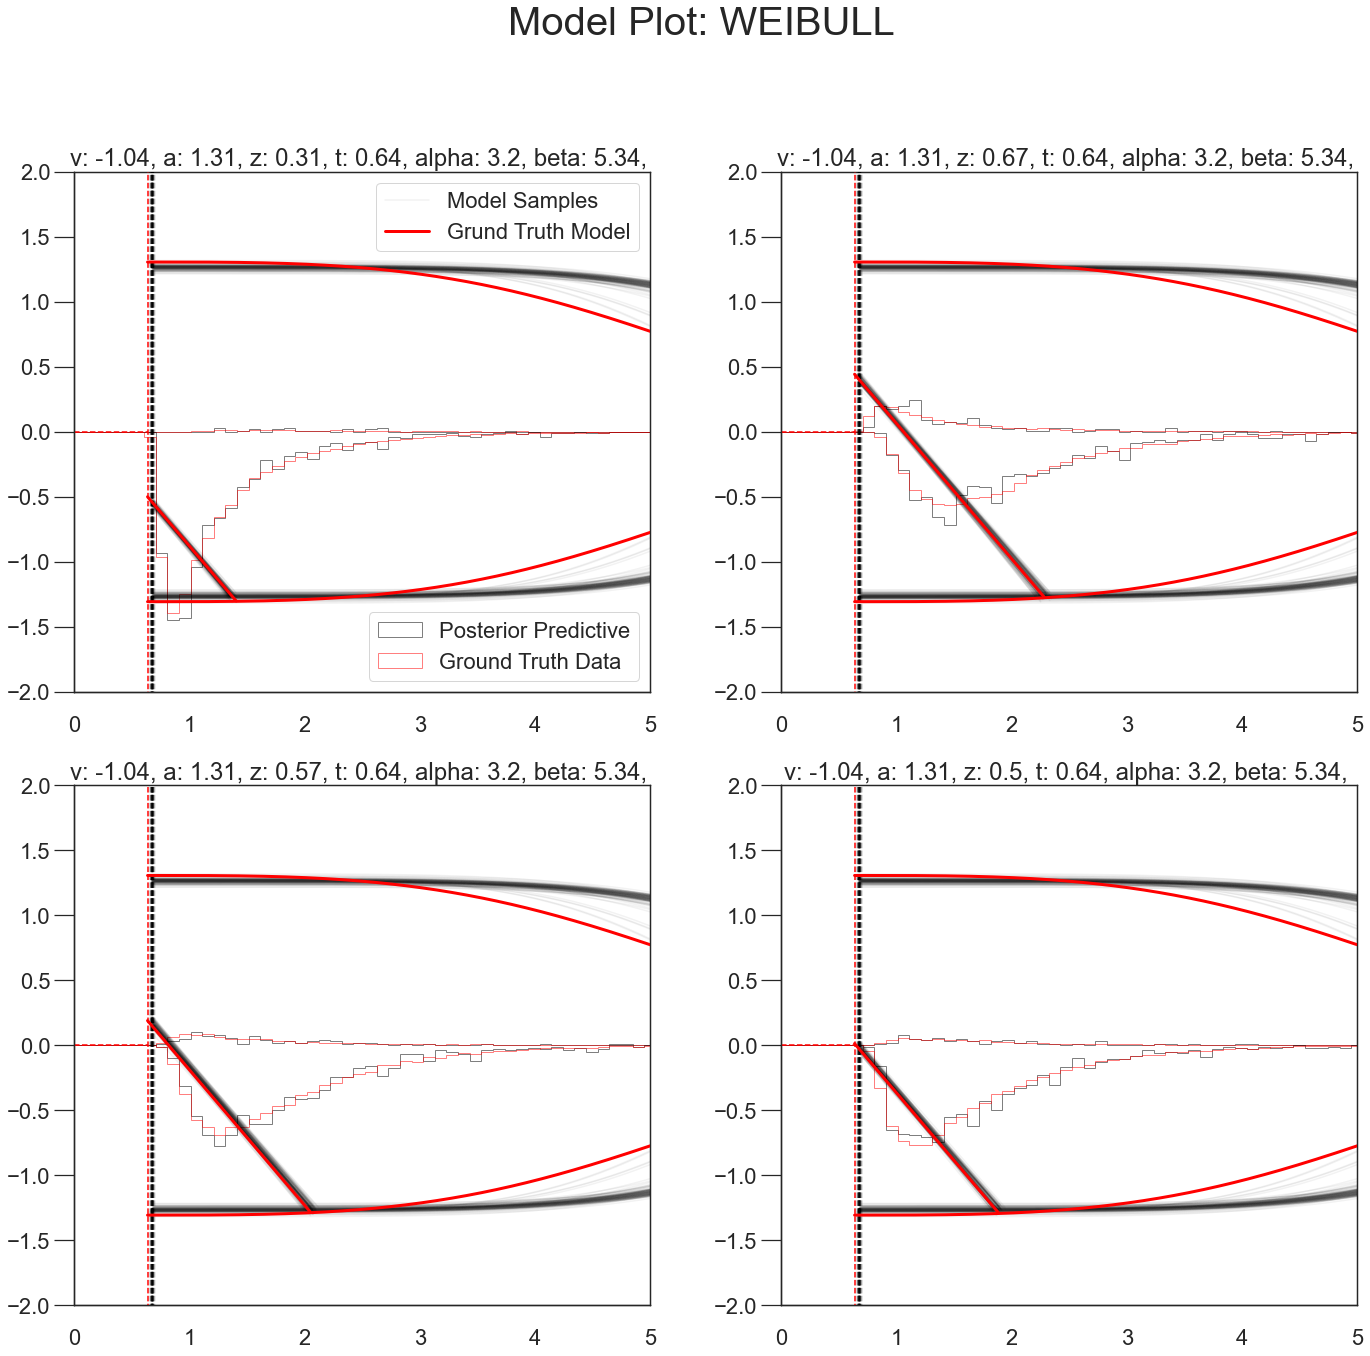

In [20]:
model_plot(posterior_samples = hddm_model_condition.get_traces(),
           ground_truths = gt_mat_condition,
           model = 'weibull_cdf',
           datatype = 'condition',
           input_hddm_trace = True,
           n_post_params = 100,
           n_plots = 1,
           cols = 2,
           show_model = True)

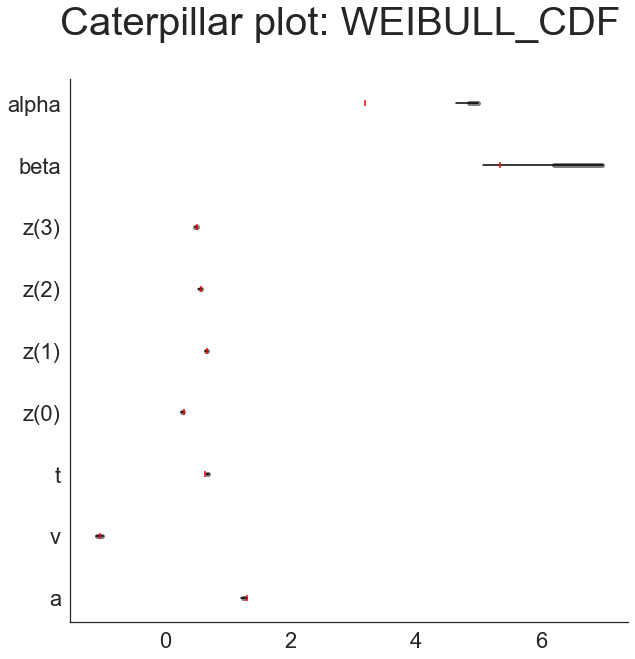

In [19]:
caterpillar_plot(posterior_samples = hddm_model_condition.get_traces(),
                 ground_truths = gt_condition,
                 model = 'weibull_cdf',
                 datatype = 'condition',
                 drop_sd = True)

In [25]:
# MODEL COMPARISON (?!)


In [5]:
a = np.array([1,2,3])

In [6]:
a < 3

array([ True,  True, False])

In [5]:
import sys
sys.path.append('configs')

import tutorial_config

In [7]:
tutorial_config.tutorial_config

{'ddm_tutorial': {'parameters': ['v', 'a', 'z', 't'],
  'param_bounds_sampler': [[-2.0, 2.0], [0.5, 2.0], [0.3, 0.7], [0.2, 1.8]],
  'param_bounds_cnn': [[-3.0, 3.0], [0.3, 2.5], [0.1, 0.9], [0.0, 2.0]],
  'boundary_param_bounds_network': [],
  'boundary_param_bounds_sampler': [],
  'boundary_param_bounds_cnn': []},
 'angle_tutorial': {'parameters': ['v', 'a', 'z', 't', 'theta'],
  'param_bounds': [[-2.0, 2.0], [0.5, 1.8], [0.3, 0.7], [0.2, 1.8]],
  'boundary_param_bounds_network': [[0, 1.4707963267948965]],
  'boundary_param_bounds_sampler': [[0.2, 1.0707963267948966]],
  'boundary_param_bounds_cnn': [[0, 1.3707963267948966]]},
 'weibull_cdf_tutorial': {'parameters': ['v', 'a', 'z', 't', 'alpha', 'beta'],
  'param_bounds': [[-2.0, 2.0], [0.5, 1.7], [0.3, 0.7], [0.2, 1.8]],
  'boundary_param_bounds_network': [[0.3, 5.0], [0.3, 7.0]],
  'boundary_param_bounds': [[1.0, 4.0], [1.0, 6.0]],
  'boundary_param_bounds_cnn': [[0.3, 5.0], [0.3, 7.0]]}}

In [71]:
# SECTION 5: MODEL RECOVERY 


In [117]:
# Let's generate data from one of our three models
weibull_params = make_parameter_sets(model = 'angle',
                                     n_parameter_sets = 1)

simulations = simulator(theta = weibull_params.values[0],
                        model = 'angle', 
                        n_samples = 1000)

hddm_data_single_subject_weibull = hddm_preprocess(simulations)

In [118]:
# Now we fit for each model:
hddm_model_single_subject_weibull = hddm.HDDMnn_weibull(hddm_data_single_subject_weibull, 
                                                informative = False, 
                                                free = False, 
                                                k = True,
                                                include = ['z'],
                                                is_group_model = False)

In [119]:
nmcmc = 500
hddm_model_single_subject_weibull.sample(nmcmc, 
                                         burn = 200)

 [-----------------100%-----------------] 501 of 500 complete in 59.5 sec

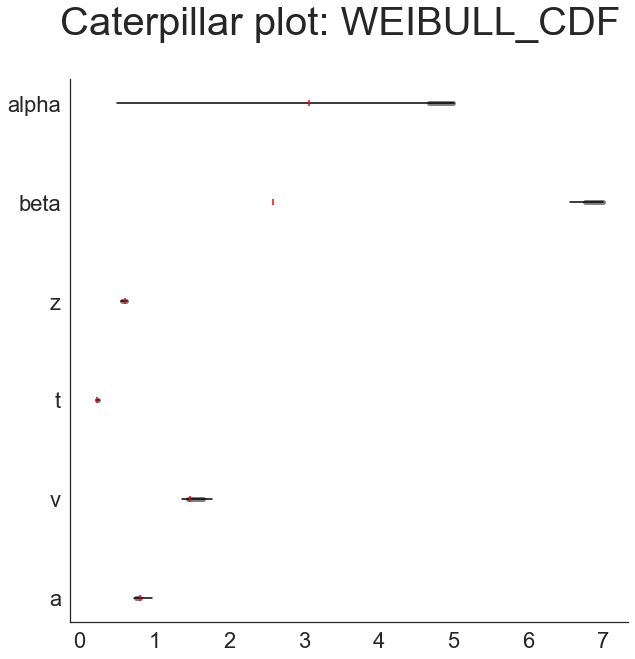

In [108]:
# Caterpillar Plot: (Parameters recovered ok?)
caterpillar_plot(posterior_samples = hddm_model_single_subject_weibull.get_traces(),
                 ground_truths = weibull_params.values[0],
                 model = 'weibull_cdf',
                 datatype = 'single_subject',
                 drop_sd = True)

passed through legend part
0
0


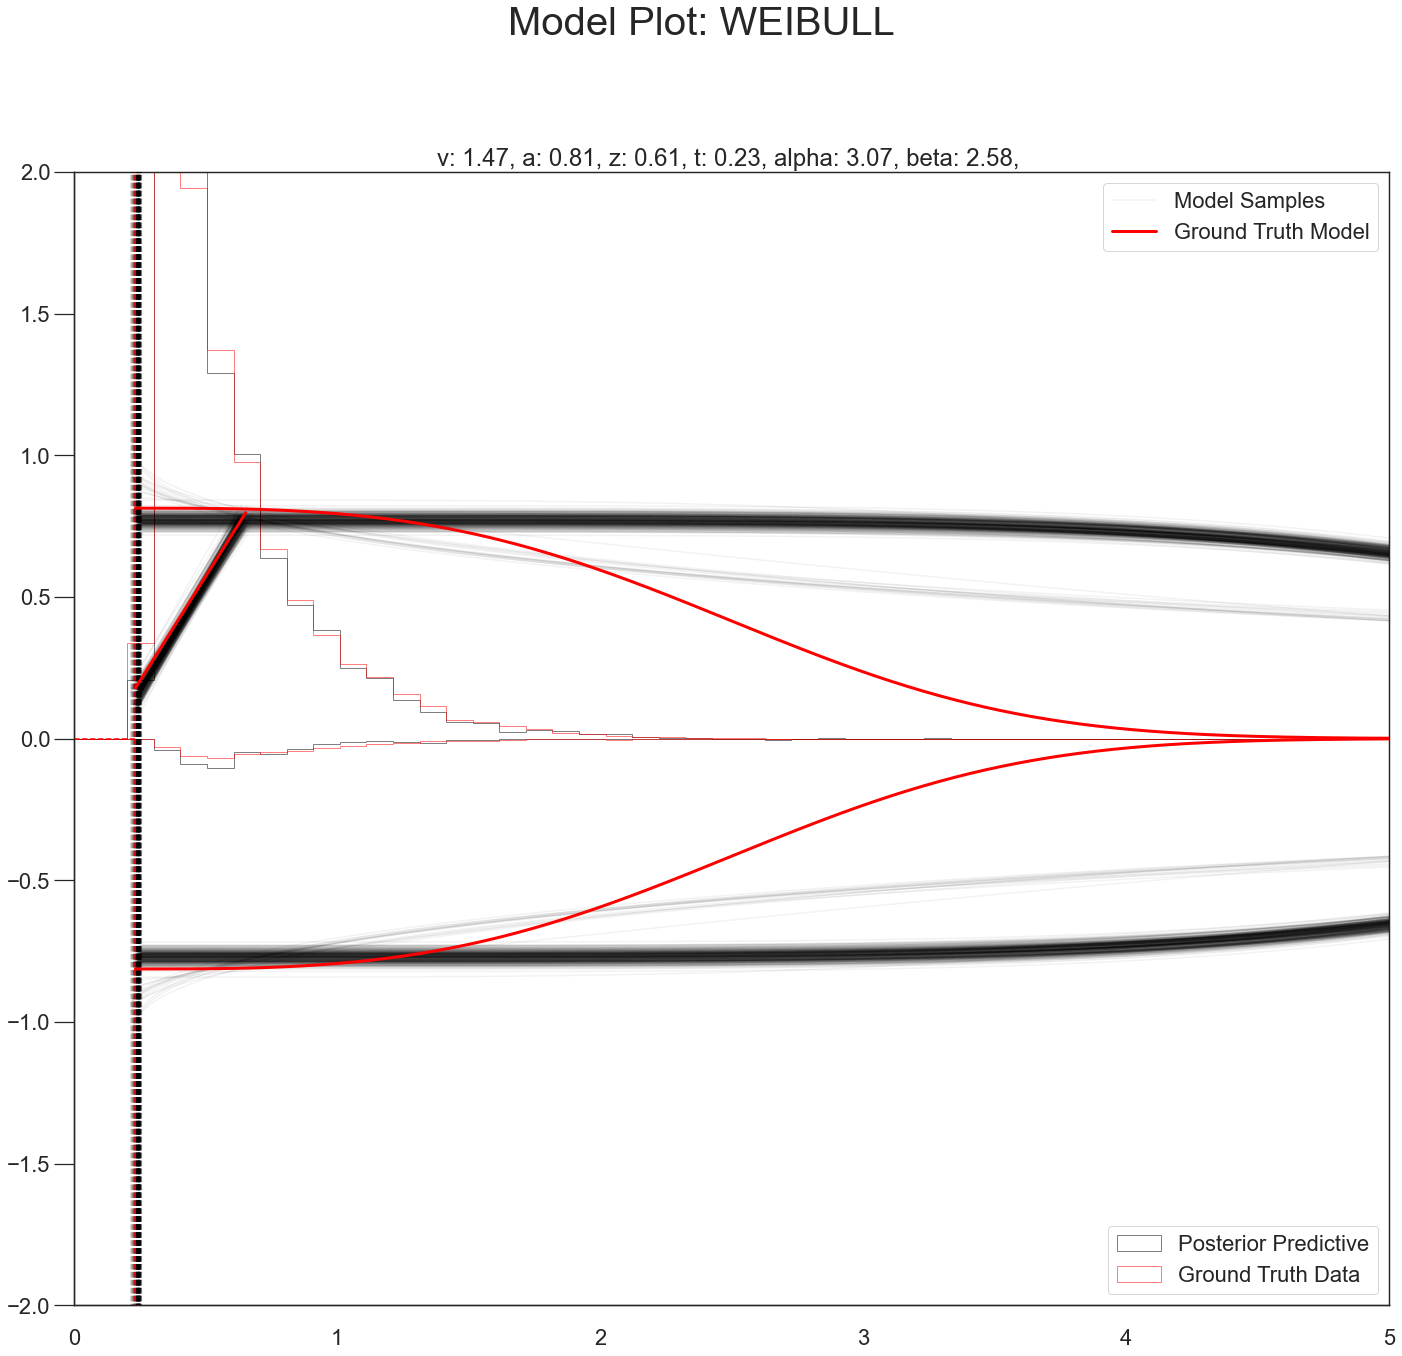

In [109]:
# Posterior Predictive: Do the 'Posterior Models' also make sense?
model_plot(ground_truths = weibull_params.values[0],
           posterior_samples = hddm_model_single_subject_weibull.get_traces(),
           model = 'weibull_cdf',
           n_post_params = 300,
           cols = 1,
           n_plots = 1,
           max_t = 5,
           show_model = True,
           input_hddm_trace = True,
           datatype = 'single_subject')

In [120]:
# Now we fit for each model:
hddm_model_single_subject_angle = hddm.HDDMnn_angle(hddm_data_single_subject_weibull, 
                                                informative = False, 
                                                free = False,
                                                include = ['z'],
                                                is_group_model = False)

In [121]:
nmcmc = 500
hddm_model_single_subject_angle.sample(nmcmc, 
                                 burn = 200)

 [-----------------100%-----------------] 501 of 500 complete in 49.8 sec

In [ ]:
# Caterpillar Plot: (Parameters recovered ok?)
caterpillar_plot(posterior_samples = hddm_model_single_subject_angle.get_traces(),
                 ground_truths = weibull_params.values[0],
                 model = 'weibull_cdf',
                 datatype = 'single_subject',
                 drop_sd = True)

In [ ]:
# Posterior Predictive: Do the 'Posterior Models' also make sense?
model_plot(ground_truths = weibull_params.values[0],
           posterior_samples = hddm_model_single_subject_weibull.get_traces(),
           model = 'weibull_cdf',
           n_post_params = 300,
           cols = 1,
           n_plots = 1,
           max_t = 5,
           show_model = True,
           input_hddm_trace = True,
           datatype = 'single_subject')

In [112]:
hddm_model_single_subject_angle.get_traces().mean()

a          0.819563
v          1.679948
t          0.229333
z_trans    0.315967
theta      0.041026
dtype: float64

In [124]:
params = hddm_model_single_subject_angle.get_traces().mean()[['v', 'a', 'z_trans', 't', 'theta']]
params['z_trans'] = 1 / (1 + np.exp( - params['z_trans']))

passed through legend part
0
0


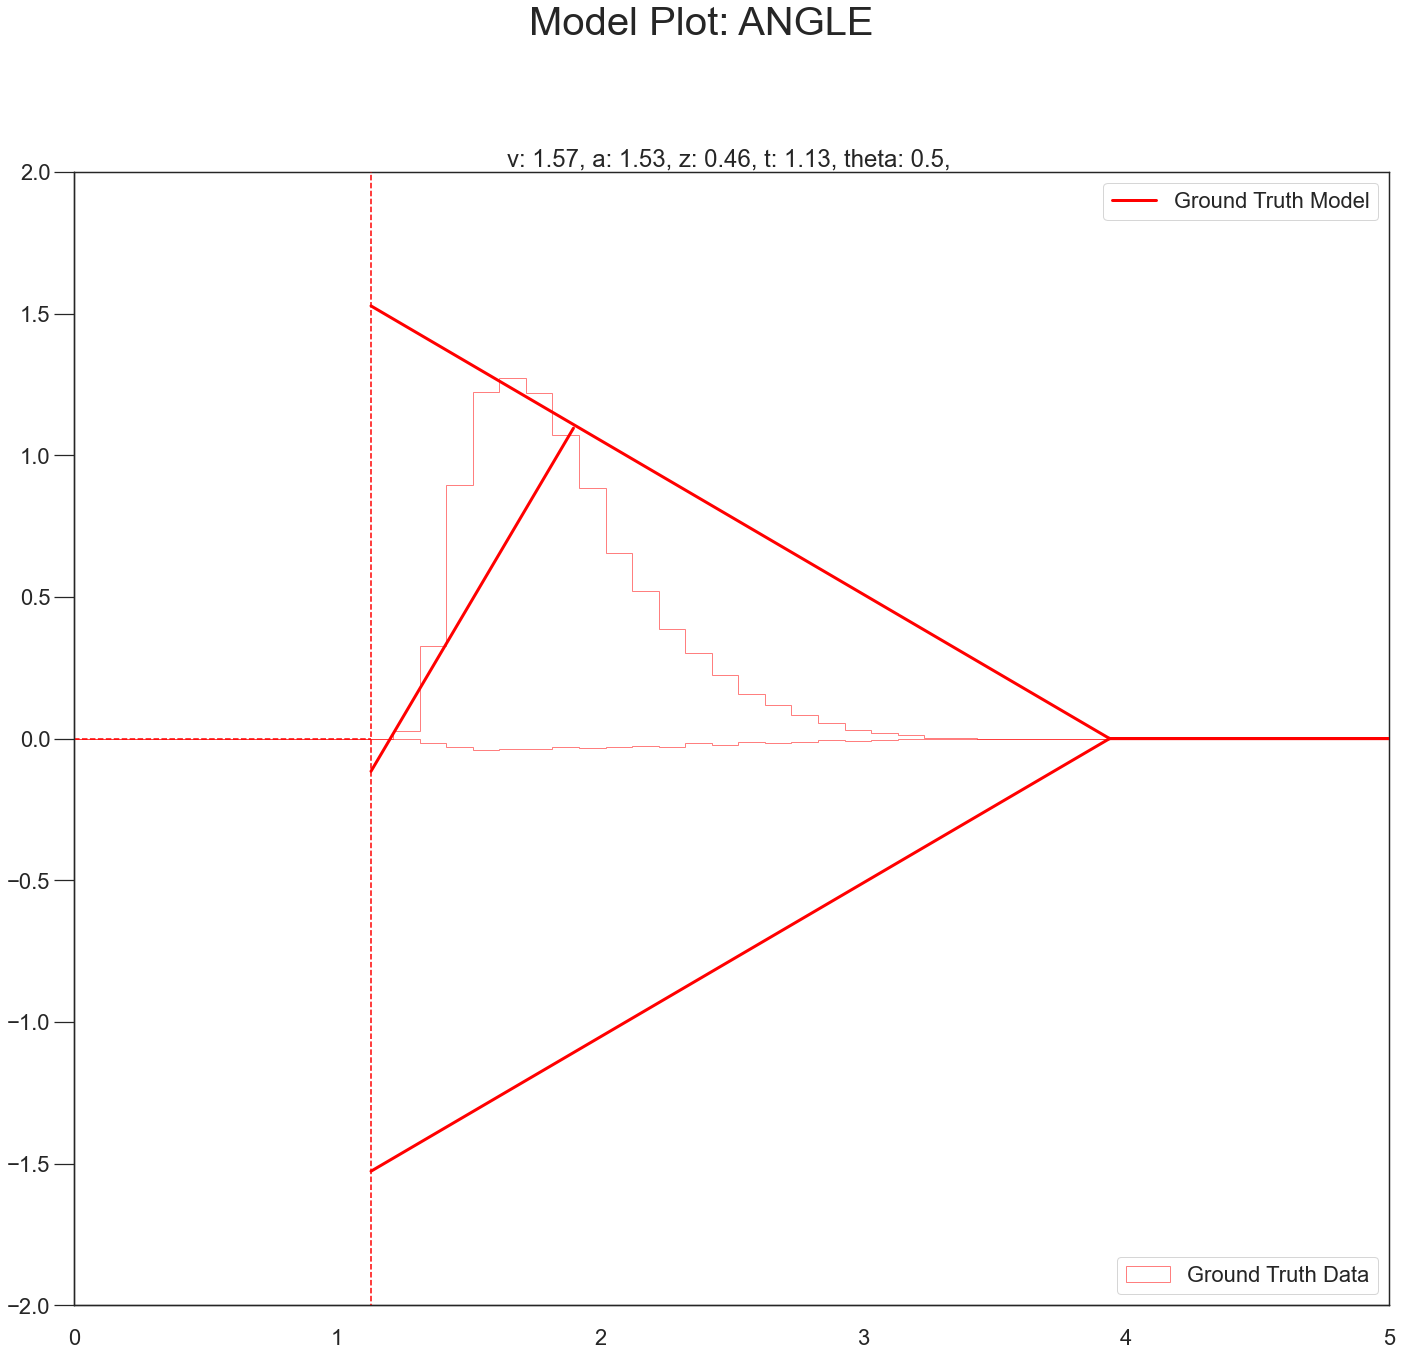

In [125]:
model_plot(ground_truths = params.values,
           posterior_samples = None,
           model = 'angle',
           n_post_params = 0,
           cols = 1,
           n_plots = 1,
           max_t = 5,
           show_model = True,
           input_hddm_trace = False,
           datatype = 'single_subject')

In [122]:
hddm_model_single_subject_angle.dic

794.1958325195312

In [123]:
hddm_model_single_subject_weibull.dic

793.5272098795574